<a href="https://colab.research.google.com/github/marianatimbo/vision-cnn-notebooks/blob/main/Assignment_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: Fashion MNIST
You are going to use the same methods presented in the previous video in order to classify clothes from a black and white dataset of images (image by Zalando, MIT License):
![](https://tensorflow.org/images/fashion-mnist-sprite.png)

The class labels are:
```
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
```

### 1. Preparing the input data
Let's first import the dataset.

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [5]:
# TODO: Normalize the training and testing set using standardization
def normalize(x,m,s):
    return (x - m)/s

train_mean = X_train.mean()
train_std = X_train.std()

X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)


In [6]:
print(f'Training Mean after standardization {X_train.mean():.3f}')
print(f'Training Std after standardization {X_train.std():.3f}')
print(f'Test Mean after standardization {X_test.mean():.3f}')
print(f'Test Std after standardization {X_test.std():.3f}')

Training Mean after standardization -0.000
Training Std after standardization 1.000
Test Mean after standardization 0.002
Test Std after standardization 0.998


### 2. Training with fully connected layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8032 - loss: 0.5587 - val_accuracy: 0.8501 - val_loss: 0.4202
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8724 - loss: 0.3504 - val_accuracy: 0.8541 - val_loss: 0.4059


### 3. Extending to CNNs
Now your goal is to develop an architecture that can reach a test accuracy higher than 0.85.

In [9]:
# TODO: Reshape the dataset in order to add the channel dimension
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [23]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(6, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(160, activation='relu'),
    Dense(120, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7604 - loss: 0.6489 - val_accuracy: 0.8594 - val_loss: 0.3829
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8715 - loss: 0.3493 - val_accuracy: 0.8775 - val_loss: 0.3390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8903 - loss: 0.2954 - val_accuracy: 0.8848 - val_loss: 0.3210
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9030 - loss: 0.2642 - val_accuracy: 0.8889 - val_loss: 0.3075
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9102 - loss: 0.2367 - val_accuracy: 0.8920 - val_loss: 0.2942
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9156 - loss: 0.2234 - val_accuracy: 0.8873 - val_loss: 0.2979
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9202 - loss: 0.2074 - val_accuracy: 0.8970 - val_loss: 0.2924
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9268 - loss: 0.1906 -

### 4. Visualizing Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


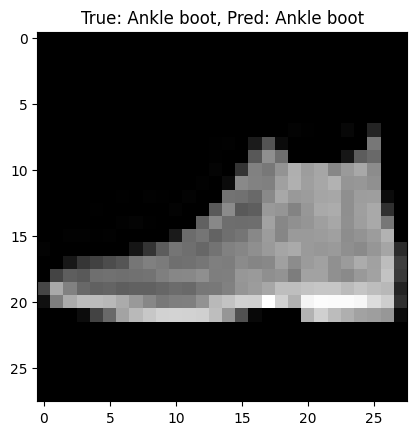

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


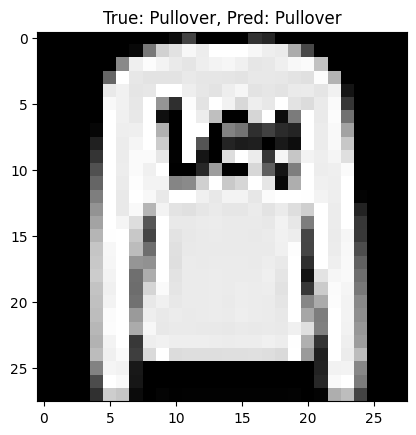

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


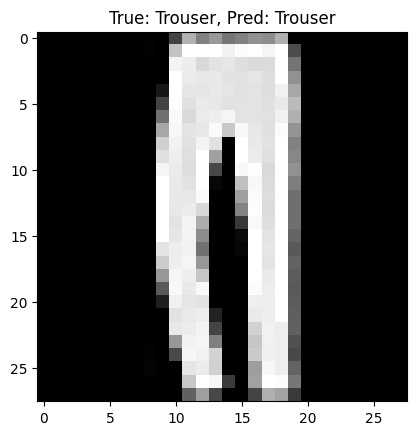

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


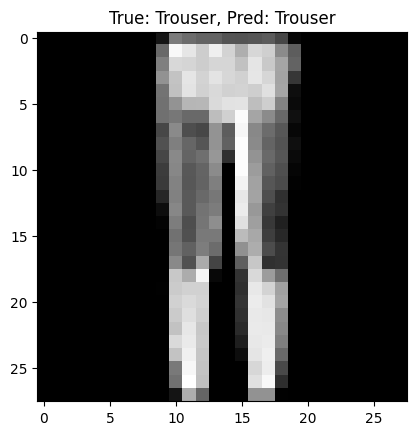

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


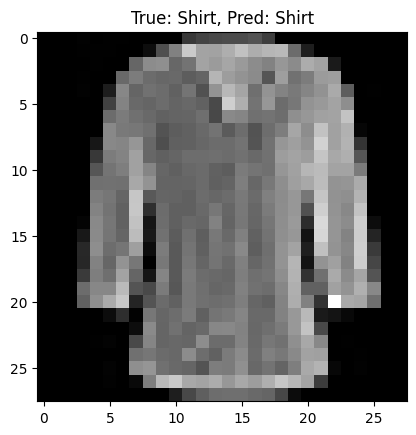

In [21]:
import numpy as np
import matplotlib.pyplot as plt

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in range(5):
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    out = model.predict(X_test[idx].reshape(1,28,28,1))
    plt.title("True: {}, Pred: {}".format(label_names[y_test[idx]], label_names[np.argmax(out)]))
    plt.show()